# Tarea 3: Fundamentos de Ciencias de Datos

Una vez descargados los datos, verificamos que los mismos no posean filas sin 
vacias. Para esto, ubicamos la ruta del archivo a través del comando 

In [78]:
# Importamos las librerias a utilizar y cargamos los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://raw.githubusercontent.com/loki2009100/Tutor-John/main/Country-data.csv"

df = pd.read_csv(url)

datosnull = df.isnull().sum()

datosnull[1:10,]

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Analizando el número de componentes principales óptimo

Es conocido, que el número de componentes principales óptimo para la realizacón del análisis, obedece a la siguiente relación $$\min (n-1,p),$$ donde $n$ es el número de observaciones del conjunto de datos y $p$ el número de variables que posee este. Ahora bien, quitando la variable categórica *country*, tendremos un total de 9 componentes principales. Ahora, deseamos analizar las varianzas y las medias de las variables a estudiar:


In [122]:
datos1 = df.iloc[:,1:10]

datos1.head()

# Calculo de media


print("Cálculo de Media")

media = datos1.mean()

print(media)

# Cálculo de Varianza

print("")
print("Cálculo de Varianza")

varianza = datos1.var()

print(varianza)


Cálculo de Media
child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

Cálculo de Varianza
child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


Notemos que *ggdp* e *income* son las variables con mayor varianza. Entonces, procedemos a estandarizar las variables y aplicamos **PCA**



In [87]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(datos1)

# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0060241  -0.32000945 -0.2016093  -0.12797725 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.32000945  1.0060241  -0.11509761  0.74182289  0.51989676 -0.10794074
   0.3182181  -0.32193832  0.42124719]
 [-0.2016093  -0.11509761  1.0060241   0.09629328  0.1303592  -0.2569142
   0.21196135 -0.19785877  0.34804965]
 [-0.12797725  0.74182289  0.09629328  1.0060241   0.12314364 -0.2484822
   0.05471819 -0.16000656  0.11619394]
 [-0.52747354  0.51989676  0.1303592   0.12314364  1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.10794074 -0.2569142  -0.2484822  -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.3182181   0.21196135  0.05471819  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.32193832 -0.19785877 -0.16000656 -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.42124719  0.34804965  0.11619394  0.90096644 -0.22296618

In [88]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
   0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
  -0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
  -0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.02523614 -0.01153775  0.10463252]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
  -0.29403981 -0.50466425  0.01848639]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
   0.02633585  0.29335267  0.02882643]
 [-0.39264482  0.0460224  -0.12297749 -0.53199457 -0.18016662 -0.01677876
   0.625

In [89]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.16057017460857
1.555661647854348
1.1774338025373767
1.0007772405888318
0.6645986608738879
0.2249279951006571
0.11412210171337575
0.08884737663271051
0.0672778675601314


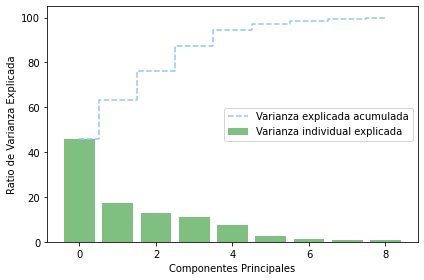

In [95]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(9), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()


Luego, se necesitarían 5 componentes principles para explicar más de 80% de la varianza observada.

## Elección de las variables con mayor contribución

Analizando la matriz de **PCA,** obtenemos:

- PC1 recoge en mayor medida informacion de *child_mort* y en menor medida *exports*. 

- Para PC2, influye más *health* y en menor medida *imports*. 

- Para PC3, influye en mayor medida *inflation* y en menor medida *life_expec*. 

- Para PC4, influye en mayor medida *income* y en menor medida *life_expec*. 

- Para PC5, influye en mayor medida *gdpp* y en menor medida *income*. 

- Para PC6, influye en mayor medida *inflation* y en menor medida *health*. 

- Para PC7, influye en mayor medida *gdpp* y en menor medida *child_mort*. 

- Para PC8, inflye en mayor medida *child_mort* y en menor medida *total_fer*. 

- Para PC9, influye en mayor medida *imports* y en menor medida *total_fer*.

## Analisis de países

- Como en el dataframe datos, Irlanda esta asociada a la fila 74, entonces:

In [106]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1),
                      eig_pairs[1][1].reshape(9,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)



Matriz W:
 [[ 0.41951945 -0.19288394]
 [-0.28389698 -0.61316349]
 [-0.15083782  0.24308678]
 [-0.16148244 -0.67182064]
 [-0.39844111 -0.02253553]
 [ 0.19317293  0.00840447]
 [-0.42583938  0.22270674]
 [ 0.40372896 -0.15523311]
 [-0.39264482  0.0460224 ]]


In [117]:
y = datos1.iloc[74,0:10]

y


child_mort        4.60
exports          35.00
health            7.63
imports          32.90
income        29600.00
inflation         1.77
life_expec       81.40
total_fer         3.03
gdpp          30600.00
Name: 74, dtype: float64

Luego, por lo ya mencionado en la parte anterior, Irlanda posee como atributos buenos la salud.

- Ahora bien, tal país tendría un buen sistema de salud pero una mortalidad infantil muy alta lo cual se traduciría en la extinción de su población a una rata elevada.

- Por último,

In [121]:
# Comparación entre Irlanda y Paises Bajos

y = datos1.iloc[74,0:10]

print("Irlanda")
print(y)

y1 = datos1.iloc[115,0:10]

print("")
print("Paises Bajos")
print(y1)

# Comparación entre Países Bajos y Suiza

y2 = datos1.iloc[115,0:10]

print("")
print("Paises Bajos")
print(y2)

y3 = datos1.iloc[147,0:10]

print("")
print("Suiza")
print(y3)

Irlanda
child_mort        4.60
exports          35.00
health            7.63
imports          32.90
income        29600.00
inflation         1.77
life_expec       81.40
total_fer         3.03
gdpp          30600.00
Name: 74, dtype: float64

Paises Bajos
child_mort       11.70
exports          65.70
health            2.77
imports          41.20
income        45300.00
inflation        15.60
life_expec       76.10
total_fer         2.90
gdpp          19300.00
Name: 115, dtype: float64

Paises Bajos
child_mort       11.70
exports          65.70
health            2.77
imports          41.20
income        45300.00
inflation        15.60
life_expec       76.10
total_fer         2.90
gdpp          19300.00
Name: 115, dtype: float64

Suiza
child_mort      71.90
exports         18.70
health           6.01
imports         29.10
income        2090.00
inflation        9.25
life_expec      59.30
total_fer        5.43
gdpp           702.00
Name: 147, dtype: float64


Como las PC1 y las PC2 varian relativamente igual entre Suiza y Paises Bajos, los países más disitintos son **Irlanda** y **Paises Bajos**.